<Figure size 1200x600 with 0 Axes>

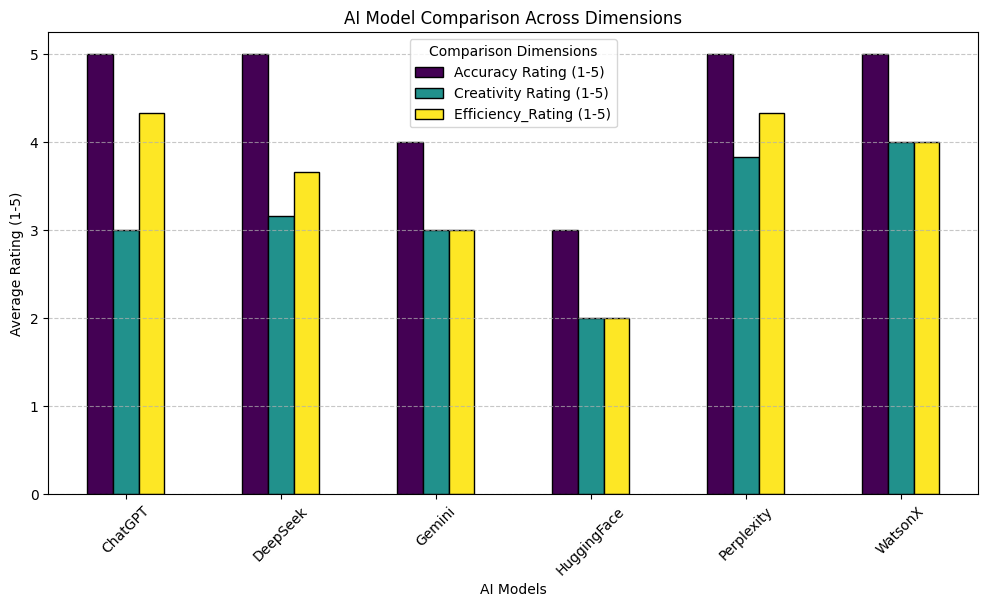

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

#Load the dataset (Ensure correct path)
file_path = r"C:\Users\shash\Downloads\Group1 - Sheet1.csv"
df = pd.read_csv(file_path)

#Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

#Drop rows with missing AI system names or ratings
rating_columns = ["Accuracy Rating (1-5)", "Creativity Rating (1-5)", "Efficiency_Rating (1-5)"]
df = df.dropna(subset=["AI_System"] + rating_columns)

#Convert rating columns to numeric (handle non-numeric errors)
df[rating_columns] = df[rating_columns].apply(pd.to_numeric, errors="coerce")

# Group data by AI system and calculate average scores
grouped_df = df.groupby("AI_System")[rating_columns].mean()

#Plot AI comparison using **Bar Chart (Matplotlib)**
plt.figure(figsize=(12, 6))
grouped_df.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")

plt.title("AI Model Comparison Across Dimensions")
plt.xlabel("AI Models")
plt.ylabel("Average Rating (1-5)")
plt.xticks(rotation=45)
plt.legend(title="Comparison Dimensions")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#Interactive Line Chart (Plotly)
fig = px.line(
    grouped_df.reset_index(),
    x="AI_System",
    y=rating_columns,
    markers=True,
    title="Interactive AI Model Comparison",
    labels={"value": "Score", "variable": "Comparison Dimension"},
)

fig.show()

#Radar Chart (Plotly) for AI Model Comparison
fig = go.Figure()

for model in grouped_df.index:
    fig.add_trace(go.Scatterpolar(
        r=grouped_df.loc[model].tolist(),
        theta=rating_columns,
        fill='toself',
        name=model
    ))

fig.update_layout(
    title="AI Model Performance Radar Chart",
    polar=dict(radialaxis=dict(visible=True, range=[1, 5])),
    showlegend=True
)

fig.show()
